In [1]:
# Perform SVD decomposition on an image.
# Keep only the 1, 10 and 50 largest singular values and reconstruct the image using these singular values.
# Keep the colors of the image and display the reconstructed image.

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
image = Image.open('IMG_20250503_190335.jpg')
image = np.array(image)

# Perform SVD decomposition at red, green and blue channels
U_r, S_r, V_r = np.linalg.svd(image[:, :, 0].astype(np.float32))
U_g, S_g, V_g = np.linalg.svd(image[:, :, 1].astype(np.float32))
U_b, S_b, V_b = np.linalg.svd(image[:, :, 2].astype(np.float32))

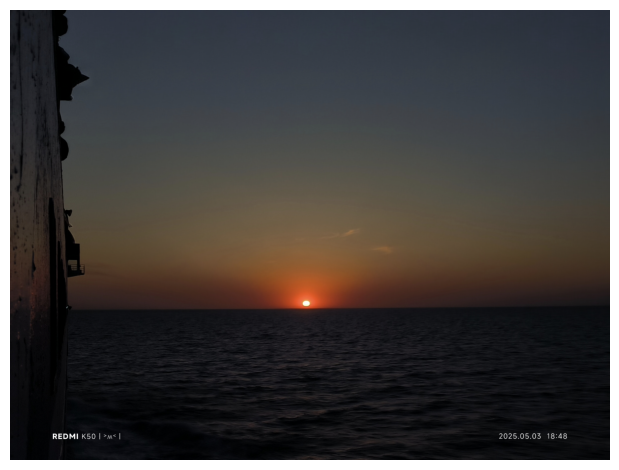

In [8]:
k = 256
image_r = np.dot(U_r[:, :k], np.dot(np.diag(S_r[:k]), V_r[:k, :]))
image_g = np.dot(U_g[:, :k], np.dot(np.diag(S_g[:k]), V_g[:k, :]))
image_b = np.dot(U_b[:, :k], np.dot(np.diag(S_b[:k]), V_b[:k, :]))
image_reconstructed = np.stack((image_r, image_g, image_b), axis=2)
image_reconstructed = np.clip(image_reconstructed, 0, 255).astype(np.uint8)
plt.imshow(image_reconstructed)
plt.axis("off")
plt.tight_layout()
plt.savefig("opt.jpeg")
plt.show()

In [ ]:

# SVD compression Keep only the 1, 10 and 50 largest singular values
k_values = [1, 2, 4, 8, 16, 32, 64, 128, 256]
fig, axes = plt.subplots(len(k_values) + 1, 1, figsize=(10, 15))

# Display the original image
axes[0].imshow(image)
axes[0].set_title('Original image')
axes[0].axis('off')

for i, k in enumerate(k_values):
    # Reconstruct the image
    image_r = np.dot(U_r[:, :k], np.dot(np.diag(S_r[:k]), V_r[:k, :]))
    image_g = np.dot(U_g[:, :k], np.dot(np.diag(S_g[:k]), V_g[:k, :]))
    image_b = np.dot(U_b[:, :k], np.dot(np.diag(S_b[:k]), V_b[:k, :]))
    image_reconstructed = np.stack((image_r, image_g, image_b), axis=2)
    image_reconstructed = np.clip(image_reconstructed, 0, 255).astype(np.uint8)

    # Display the reconstructed image
    axes[i + 1].imshow(image_reconstructed)
    axes[i + 1].set_title('Reconstructed image with k = ' + str(k))
    axes[i + 1].axis('off')

plt.tight_layout()
# plt.savefig('lab2.pdf')
plt.savefig('IMG_20250503_190335.png', dpi=500)
plt.show()

